In [24]:
import numpy as np
import pandas as pd
from scipy.io import loadmat, wavfile

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(context='talk')

from tqdm import tqdm_notebook as tqdm

# Build Overview DataFrame

In [164]:
speaker_info = {'03': ('m', 31), '08': ('f', 34), '09': ('f', 21), '10': ('m', 32), '11': ('m', 26),
                '12': ('m', 30), '13': ('f', 32), '14': ('f', 35), '15': ('m', 25), '16': ('f', 31)}
emotion_map = {'A': 'fear', 'E': 'disgust', 'W': 'anger', 'L': 'boredom', 
               'F': 'happiness', 'N': 'neutral', 'T': 'sadness'}

In [213]:
df = pd.read_csv('./EmoDB/erkennung.txt',sep='\t',encoding='Latin1',index_col=0)
exists,length,means,stds = [],[],[],[]

df.Satz = df.Satz.apply(lambda x: x.split('.')[0])
df.erkannt = df.erkannt.apply(lambda x: int(x.split(',')[0]))
df.natuerlich = df.natuerlich.apply(lambda x: int(x.split(',')[0]))
df['sex'] = df.Satz.apply(lambda x: speaker_info[x[:2]][0])
df['age'] = df.Satz.apply(lambda x: speaker_info[x[:2]][1])
df['emotion'] = df.Satz.apply(lambda x: emotion_map[x[5]])

for index,row in tqdm(df.iterrows()):    
    try:
        sample_rate,stream = wavfile.read('./EmoDB/wav/%s.wav'%row.Satz)
        exists.append(True)
        length.append(len(stream)/sample_rate) # in seconds
        stream = stream / np.max(np.abs(stream))
        means.append(np.mean(stream))
        stds.append(np.std(stream))
    except: # wave-file not found
        exists.append(False)
        length.append(np.nan) # in seconds
        means.append(np.nan)
        stds.append(np.nan)
        pass
    
df['wav_available'] = exists
df['length'] = length
df['mean'] = means
df['std'] = stds
df = df.rename(index=str, columns={'erkannt': 'recognized', 'natuerlich': 'natural'})
df = df.set_index('Satz')
# df.to_csv('./data/overview.csv')
df.head()

/Users/flemming/miniconda3/envs/affect_recognition/lib/python3.7/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)
/Users/flemming/miniconda3/envs/affect_recognition/lib/python3.7/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)
/Users/flemming/miniconda3/envs/affect_recognition/lib/python3.7/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)
/Users/flemming/miniconda3/envs/affect_recognition/lib/python3.7/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


,recognized,natural,sex,age,emotion,wav_available,length,mean,std
Satz,,,,,,,,,
03a01Ab,65,35,m,31,fear,False,NaN,NaN,NaN
03a01Eb,60,35,m,31,disgust,False,NaN,NaN,NaN
03a01Fa,90,75,m,31,happiness,True,1.89825,-0.000311,0.082320
03a01Lb,70,35,m,31,boredom,False,NaN,NaN,NaN
03a01Nc,100,95,m,31,neutral,True,1.61125,-0.000312,0.125323


# EDA - meta

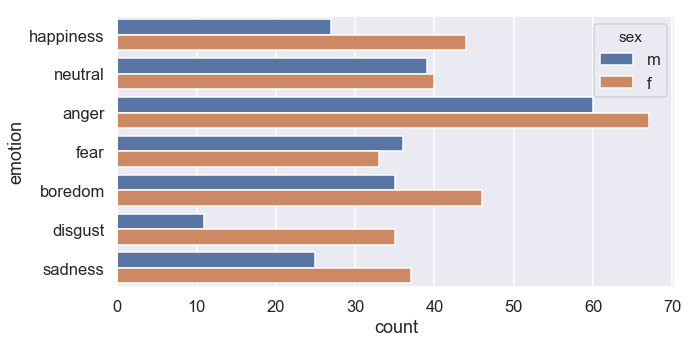

In [214]:
plt.figure(figsize=(10,5))
sns.countplot(y='emotion',hue='sex',data=df[df.wav_available])
# plt.xlim([0,len(df[df.wav_available])])

/Users/flemming/miniconda3/envs/affect_recognition/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


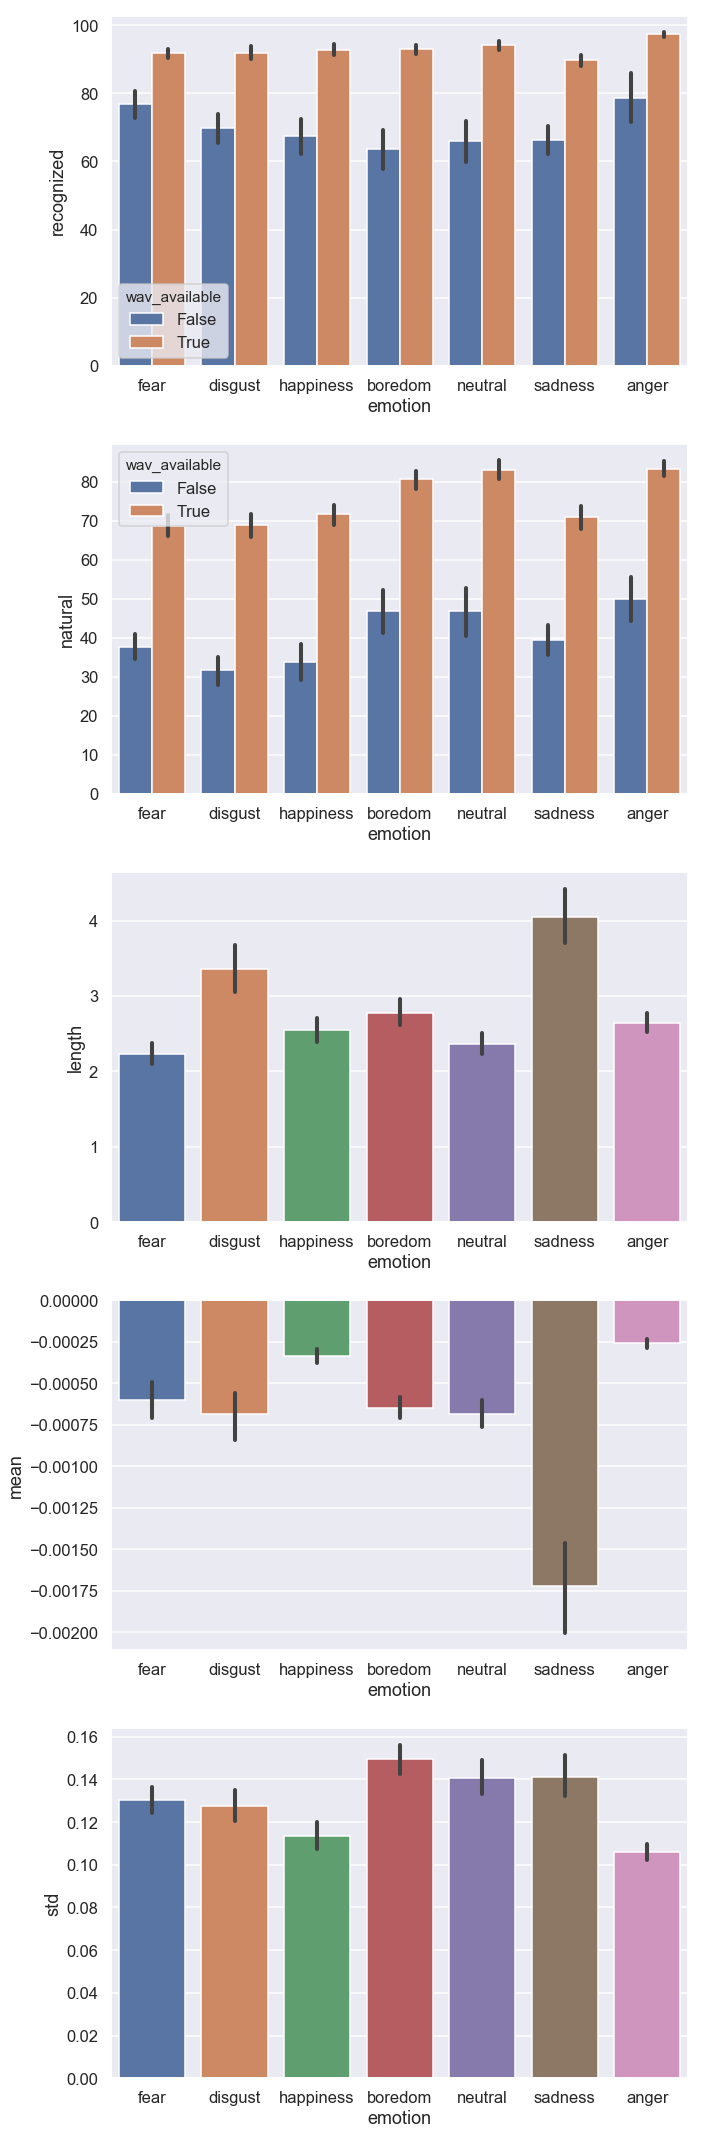

In [215]:
fig,ax = plt.subplots(ncols=1,nrows=5,figsize=(10,30))
sns.barplot(x='emotion',y='recognized',hue='wav_available',data=df,ax=ax[0])
sns.barplot(x='emotion',y='natural',hue='wav_available',data=df,ax=ax[1])
sns.barplot(x='emotion',y='length',data=df,ax=ax[2])
sns.barplot(x='emotion',y='mean',data=df,ax=ax[3])
sns.barplot(x='emotion',y='std',data=df,ax=ax[4])
plt.tight_layout()